## Download dataset from here
Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

# Step 1: Installing Modules

In [1]:
!pip install pandas numpy seaborn matplotlib scikit-learn

# Step 2: Import Python Libraries

In [18]:
# import necessary libraries

# Data
import pandas as pd
import numpy as np
import missingno as msno

# visuallization
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

#Machine Learning
## model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
## tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import Scaling Model
from sklearn.preprocessing import StandardScaler ## All features have a normal distribution of 0 mean and 1 variance.
from sklearn.preprocessing import MinMaxScaler ## Makes all features have data values between 0 and 1.
from sklearn.preprocessing import MaxAbsScaler ## Makes the absolute value of all features lie between 0 and 1.
from sklearn.preprocessing import RobustScaler
## RobustScaler is similar to StandardScaler.
## However, StandardScaler uses mean and variance, while RobustScaler uses median and quartile.
from sklearn.preprocessing import Normalizer
## The previous four methods use statistics for each feature.

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'missingno'

# Step 3: Loading Dataset

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head() #Preview top 5 data value

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### About Dataset
- gender: Student's gender, either male or female.
- race/ethnicity: Categorical group representing student's racial or ethnic background.
- parental level of education: Highest education level attained by either parent of the student.
- lunch: Type of lunch received: standard or free/reduced-price (economic indicator).
- test preparation course: Indicates if the student completed a test prep course (completed/none).
- math score: Numeric score achieved by the student in the math exam (0–100).
- reading score: Numeric score from the student’s reading exam (0–100).
- writing score: Numeric score from the student’s writing exam (0–100).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Key Insights:
1. Balanced Gender Representation
The dataset contains both male and female students, allowing fair analysis across genders.

2. Ethnic Diversity
There are 5 distinct race/ethnicity groups, enabling exploration of performance across different demographics.

3. Varied Parental Education Levels
With 6 different parental education levels, this feature may significantly influence student performance.

4. Socio-Economic Indicator via Lunch Type
The lunch column has 2 values — likely "standard" and "free/reduced" — which can indicate socio-economic status and its impact on scores.

5. No Missing Data
All 1000 entries are complete, meaning there's no need for null handling, and the dataset is clean and ready for analysis.



# Step 4: Numerical and categorical columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
score_list = []
score_mean_list = []
for row in df.iterrows():
    a = [row[1][-3],row[1][-2],row[1][-1]]
    score_list.append(a)
for i in score_list:
    score_mean_list.append(round(np.mean(i),1))

df["score_mean"] = score_mean_list
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


In [14]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are ",num_cols)

Categorical Variables are  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')
Numerical Variables are  ['math score', 'reading score', 'writing score', 'score_mean']


# Step 5: EDA and Data Cleaning
### What is EDA?
1. Understanding the Data: EDA helps in understanding the structure, distribution, and characteristics of the dataset. It provides insight into the nature of the data, such as its range, variability, and central tendencies.
2. Identifying Patterns and Relationships: EDA techniques allow for the identification of patterns, trends, and relationships within the data. This includes discovering correlations between variables, detecting outliers, and uncovering hidden patterns that may not be immediately apparent.
G3. enerating Hypotheses: EDA often leads to the generation of hypotheses or research questions. By exploring the data visually and quantitatively, analysts can formulate hypotheses about the underlying factors driving observed patterns in the data.
4. Feature Selection: EDA helps in identifying important features or variables that are relevant for modeling or analysis. By examining the relationships between variables and their associations with the target variable, analysts can determine which features are most informative for predictive modeling or further analysis.
5. Data Cleaning and Preprocessing: EDA helps in detecting and addressing data quality issues such as missing values, outliers, and inconsistencies. By identifying problematic data points early in the analysis process, analysts can take appropriate steps to clean and preprocess the data, ensuring the accuracy and reliability of subsequent analyses.
6. Communicating Results: EDA provides visualizations and summaries that facilitate communication of results to stakeholders. Visualizations such as charts, graphs, and summary statistics make it easier to convey complex findings and insights in a clear and understandable manner.
7. Informing Decision-Making: EDA helps in making informed decisions by providing insights into the data that can guide subsequent analysis, modeling, and decision-making processes. By understanding the underlying structure of the data, analysts can make more accurate predictions and formulate effective strategies

In [15]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0
996,male,group C,high school,free/reduced,none,62,55,55,57.3
997,female,group C,high school,free/reduced,completed,59,71,65,65.0
998,female,group D,some college,standard,completed,68,78,77,74.3


## 5.1 Distribution of scores by column for each test score

In [20]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']

score_column = ["math score","reading score","writing score","score_mean"]
def bias_col_scr(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(20,8))
    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        sns.kdeplot(df[scr_type], color='#e35f62', fill=True, label="score", ax=ax[row][col])
        for value in df[feature].value_counts().index:
            sns.kdeplot(df[df[feature] == value][scr_type], fill=True, label=value, ax=ax[row][col])
        ax[row][col].legend()
        ax[row][col].set_title("distribution of <"+scr_type+"> by |-"+feature)

    plt.show()

<< math score >>


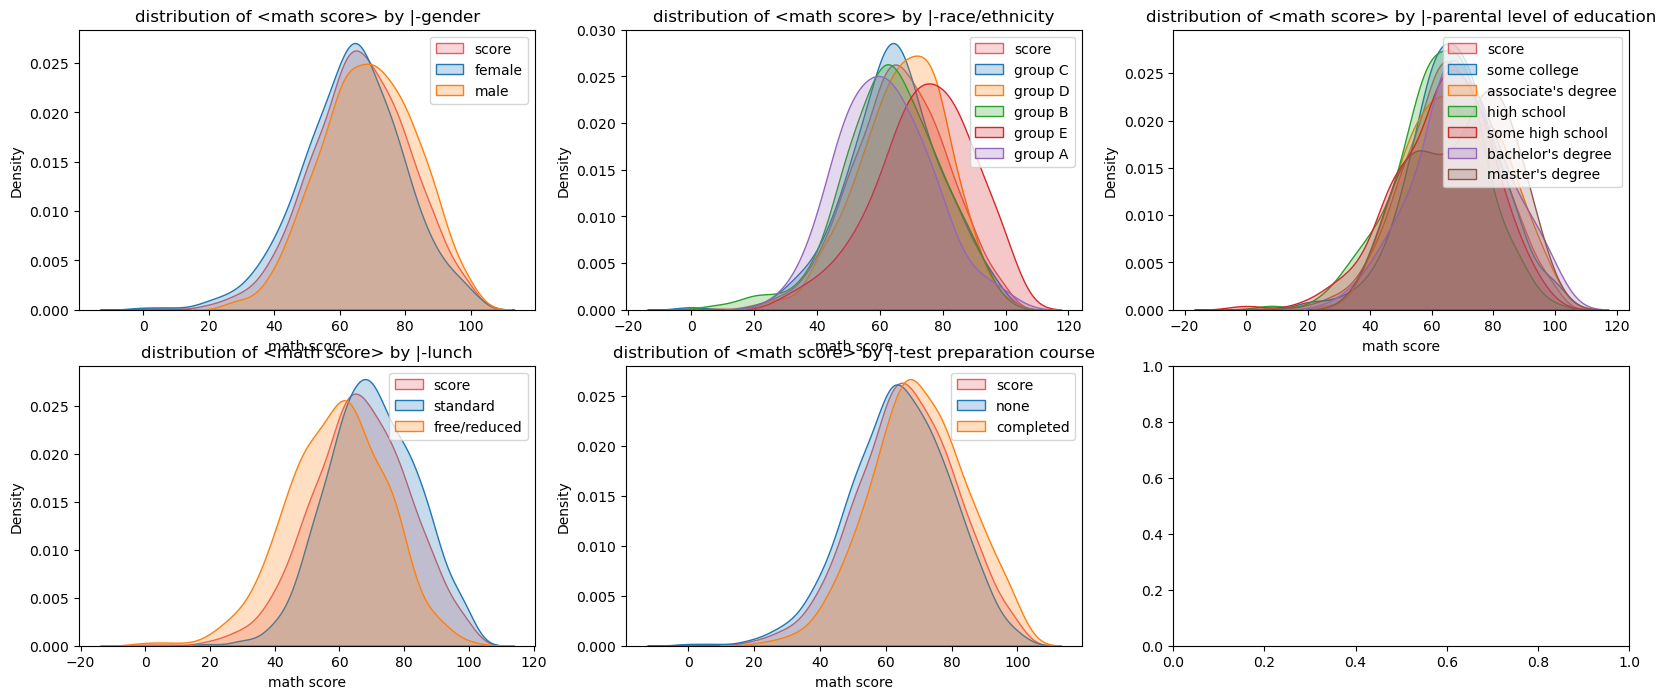

<< reading score >>


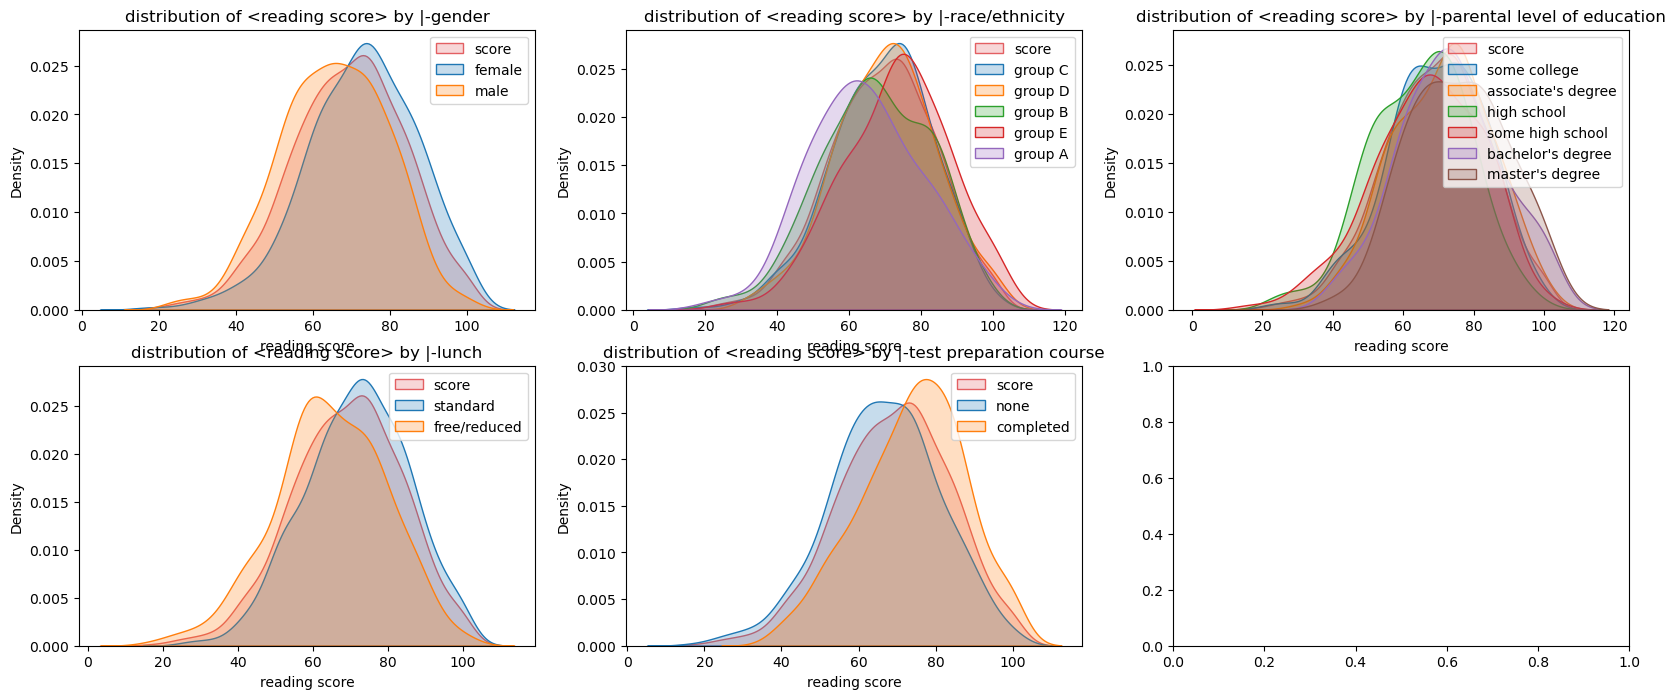

<< writing score >>


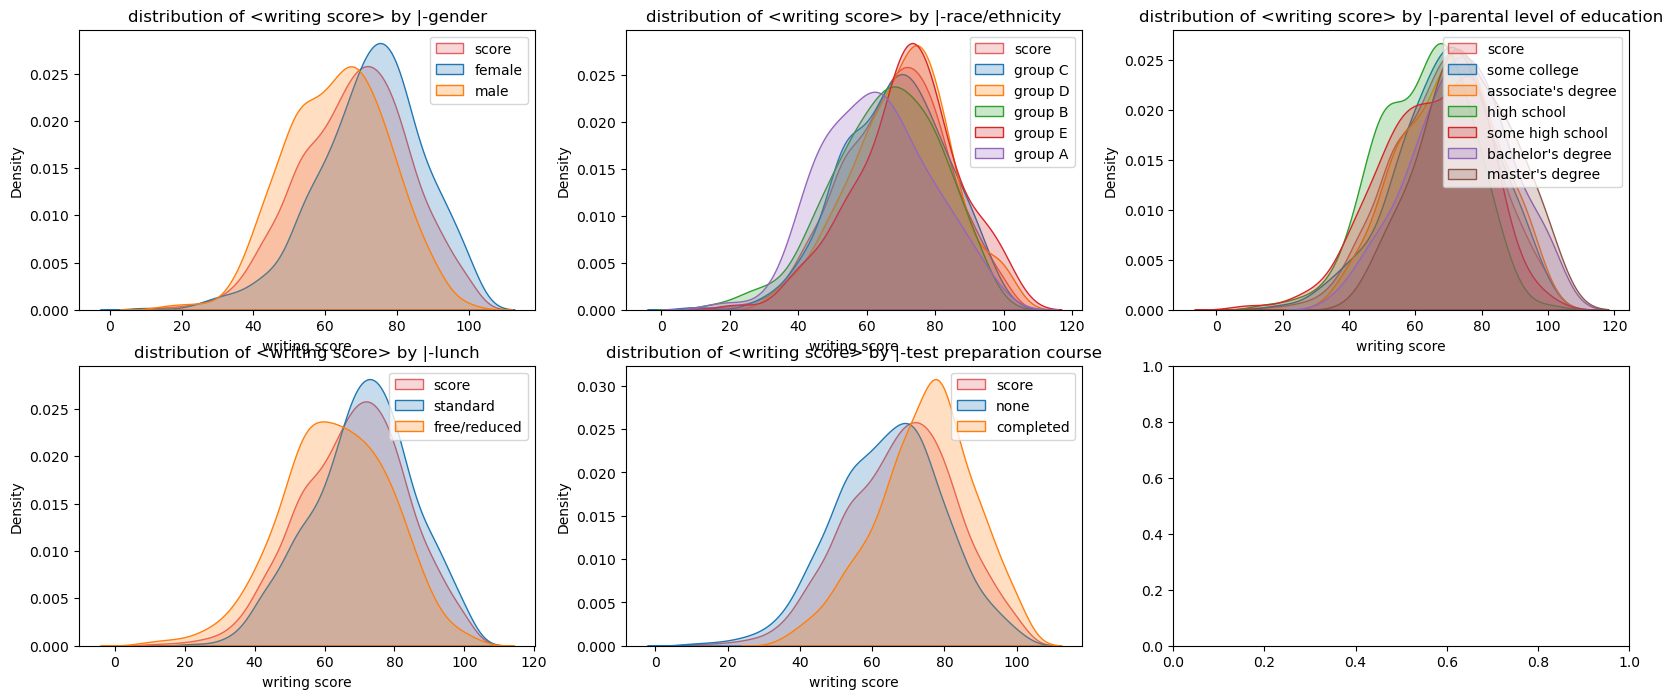

<< score_mean >>


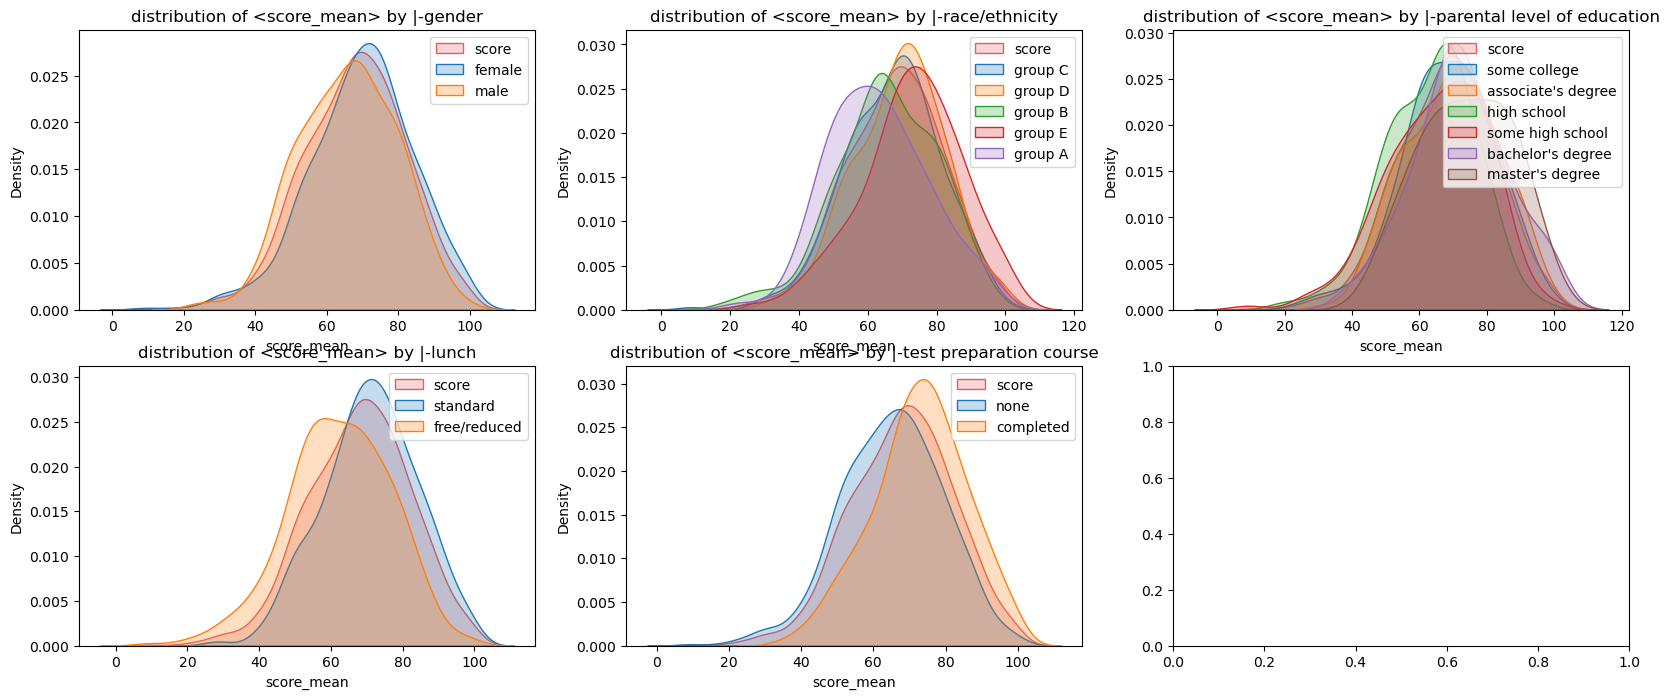

In [21]:
for i in score_column:
    print("<<",i,">>")
    bias_col_scr(i)

## 5.2 Analysis and visualization of score types for each column

In [22]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']


def bias_col_scr_2(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(15,8))
    ax = ax.flatten()
    for i, feature in enumerate(features):
        print("")
        print("<",feature,">")
        x = []
        y = []
        for j in df[feature].value_counts().index:
            print(j, ": ", np.mean(df[df[feature]==j][scr_type].values))
            x.append(j)
            y.append(np.mean(df[df[feature]==j][scr_type].values))
        plt.sca(ax[i])
        plt.bar(x, y, color='#e35f62')
        for b in range(len(x)):
            height = y[b]
            plt.text(x[b], height + 0.5, '%.1f' % height, ha='center', va='bottom', size=12)
        plt.ylim(60, 80)
        plt.title("average "+scr_type+" by "+feature)
    plt.tight_layout()
    plt.show()

<< math score >>

< gender >
female :  63.633204633204635
male :  68.72821576763485

< race/ethnicity >
group C :  64.46394984326018
group D :  67.36259541984732
group B :  63.45263157894737
group E :  73.82142857142857
group A :  61.62921348314607

< parental level of education >
some college :  67.1283185840708
associate's degree :  67.88288288288288
high school :  62.13775510204081
some high school :  63.497206703910614
bachelor's degree :  69.38983050847457
master's degree :  69.7457627118644

< lunch >
standard :  70.03410852713178
free/reduced :  58.92112676056338

< test preparation course >
none :  64.0778816199377
completed :  69.69553072625699


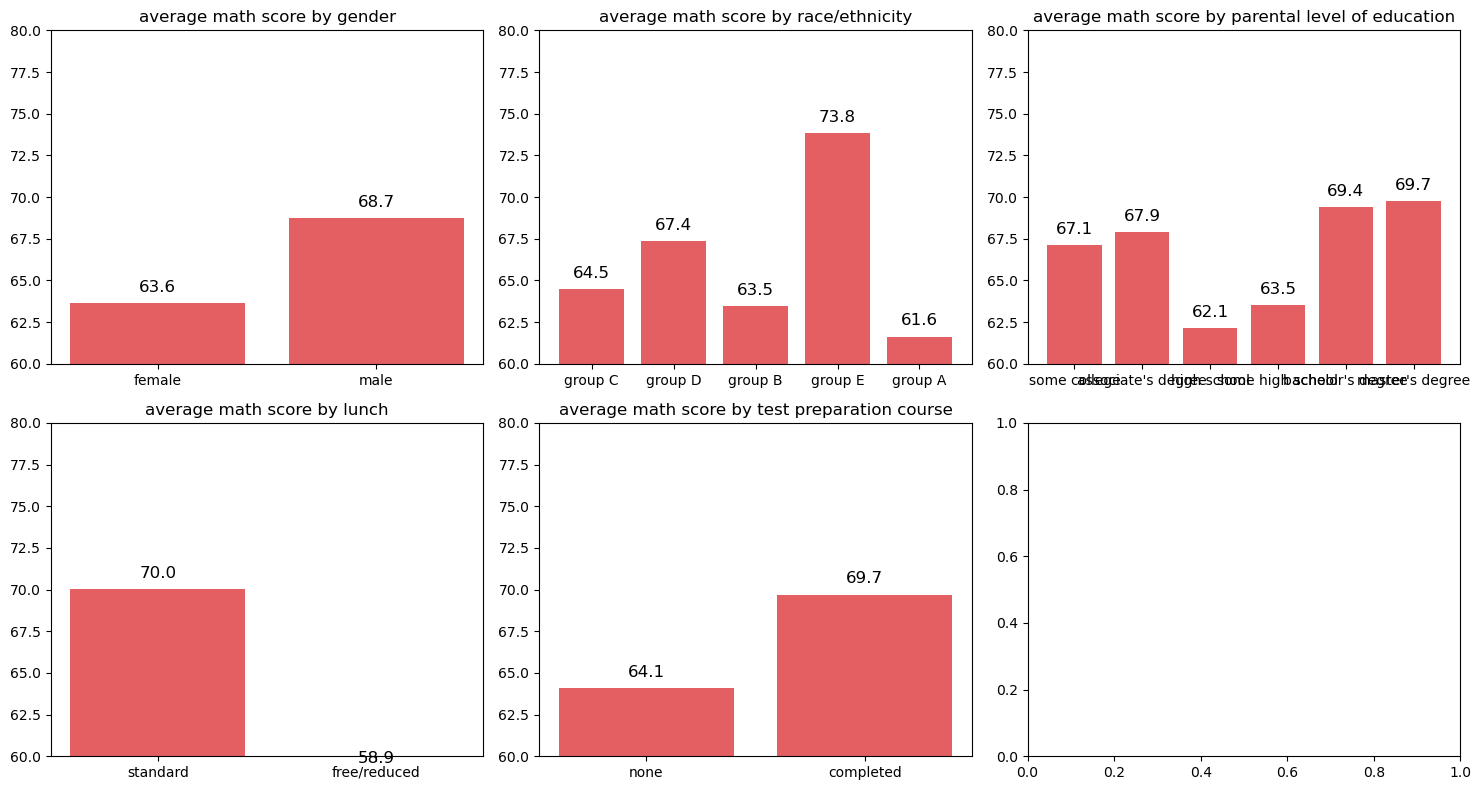

<< reading score >>

< gender >
female :  72.60810810810811
male :  65.47302904564316

< race/ethnicity >
group C :  69.10344827586206
group D :  70.03053435114504
group B :  67.35263157894737
group E :  73.02857142857142
group A :  64.67415730337079

< parental level of education >
some college :  69.46017699115045
associate's degree :  70.92792792792793
high school :  64.70408163265306
some high school :  66.93854748603351
bachelor's degree :  73.0
master's degree :  75.37288135593221

< lunch >
standard :  71.65426356589147
free/reduced :  64.65352112676057

< test preparation course >
none :  66.53426791277259
completed :  73.89385474860335


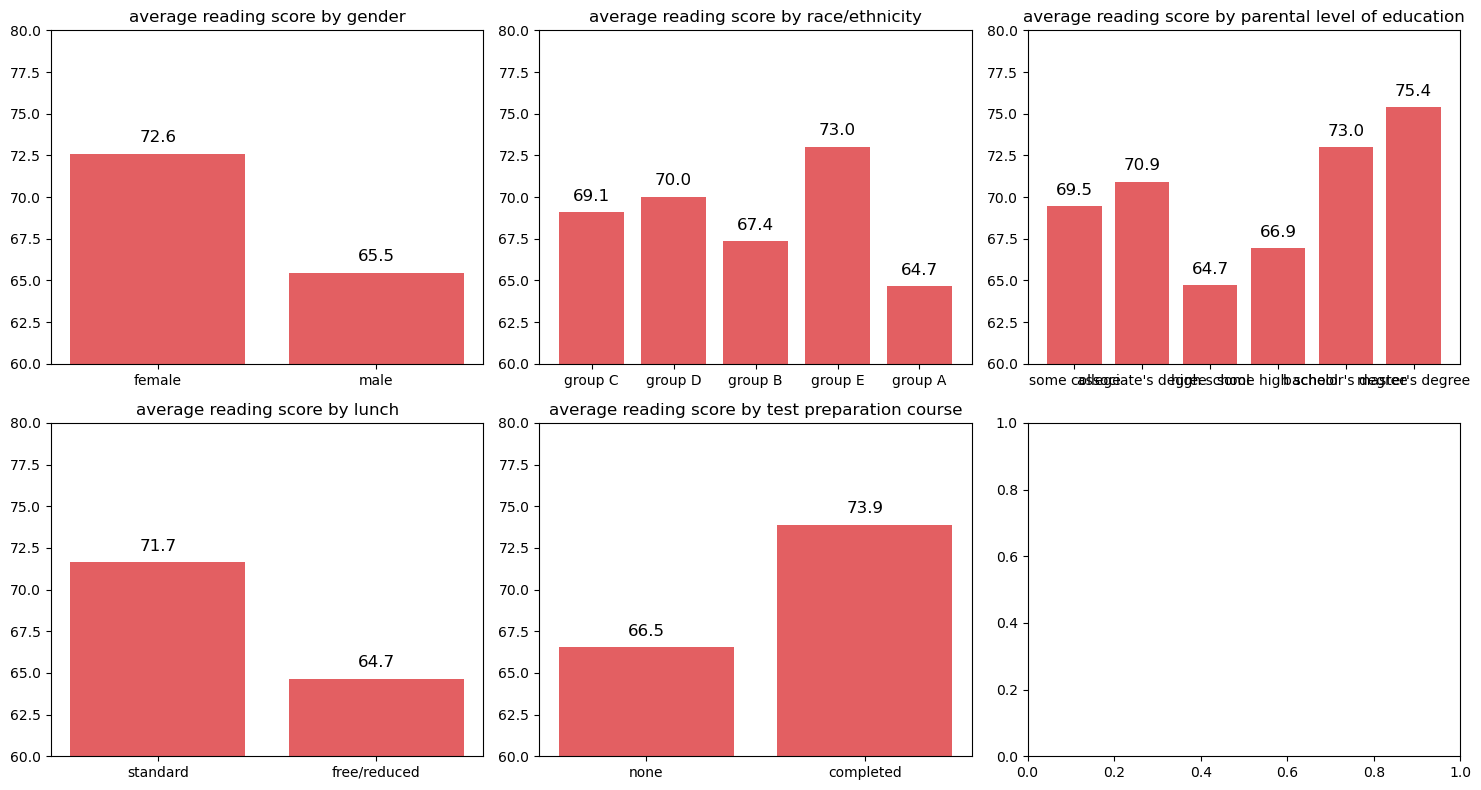

<< writing score >>

< gender >
female :  72.46718146718146
male :  63.31120331950208

< race/ethnicity >
group C :  67.82758620689656
group D :  70.14503816793894
group B :  65.6
group E :  71.40714285714286
group A :  62.674157303370784

< parental level of education >
some college :  68.84070796460178
associate's degree :  69.8963963963964
high school :  62.44897959183673
some high school :  64.88826815642459
bachelor's degree :  73.38135593220339
master's degree :  75.67796610169492

< lunch >
standard :  70.8232558139535
free/reduced :  63.02253521126761

< test preparation course >
none :  64.50467289719626
completed :  74.41899441340782


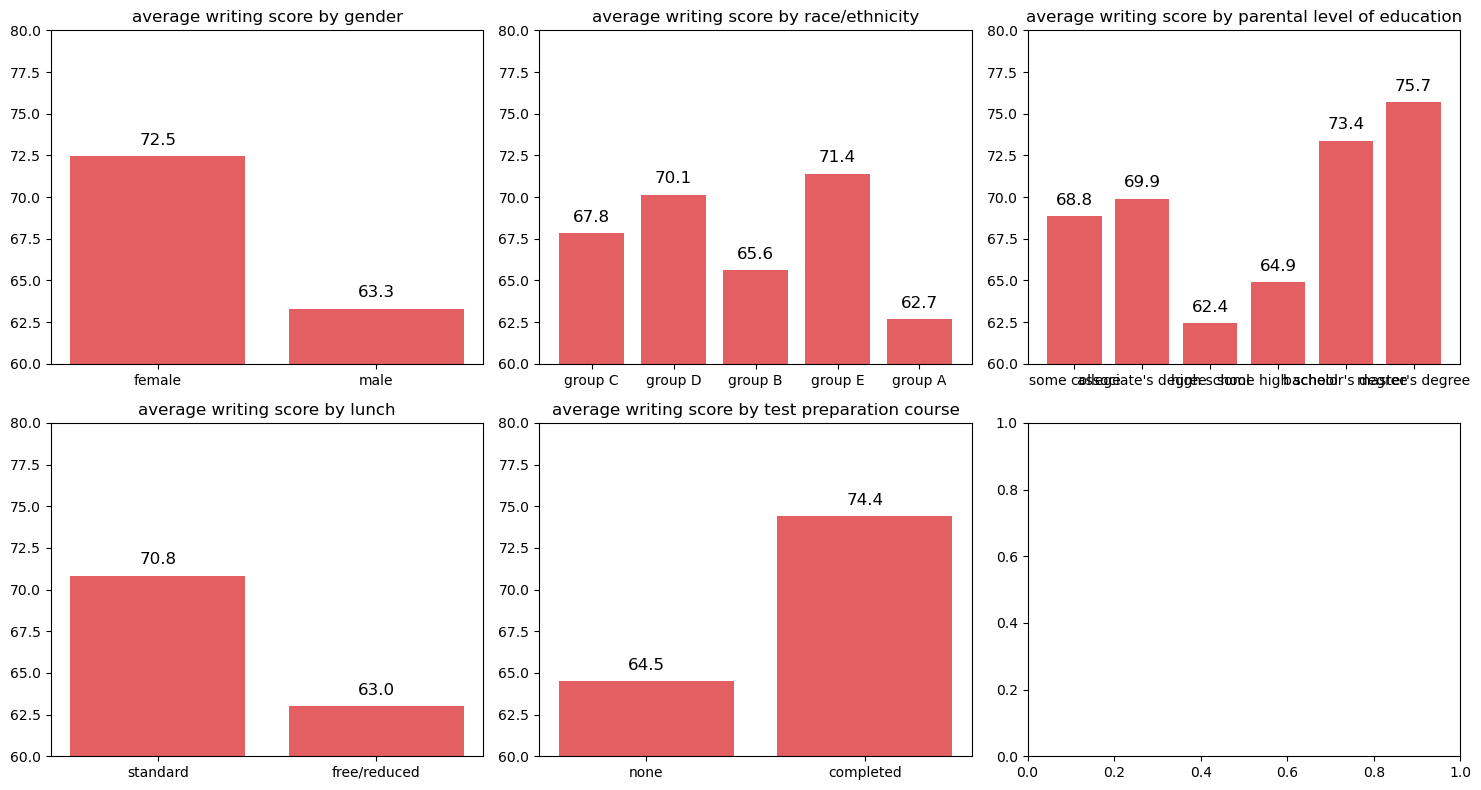

<< score_mean >>

< gender >
female :  69.56949806949807
male :  65.83568464730291

< race/ethnicity >
group C :  67.1307210031348
group D :  69.1793893129771
group B :  65.47
group E :  72.74857142857142
group A :  62.98876404494382

< parental level of education >
some college :  68.47345132743362
associate's degree :  69.56801801801801
high school :  63.099489795918366
some high school :  65.104469273743
bachelor's degree :  71.92627118644067
master's degree :  73.59661016949153

< lunch >
standard :  70.83627906976743
free/reduced :  62.19830985915493

< test preparation course >
none :  65.03753894080997
completed :  72.66955307262569


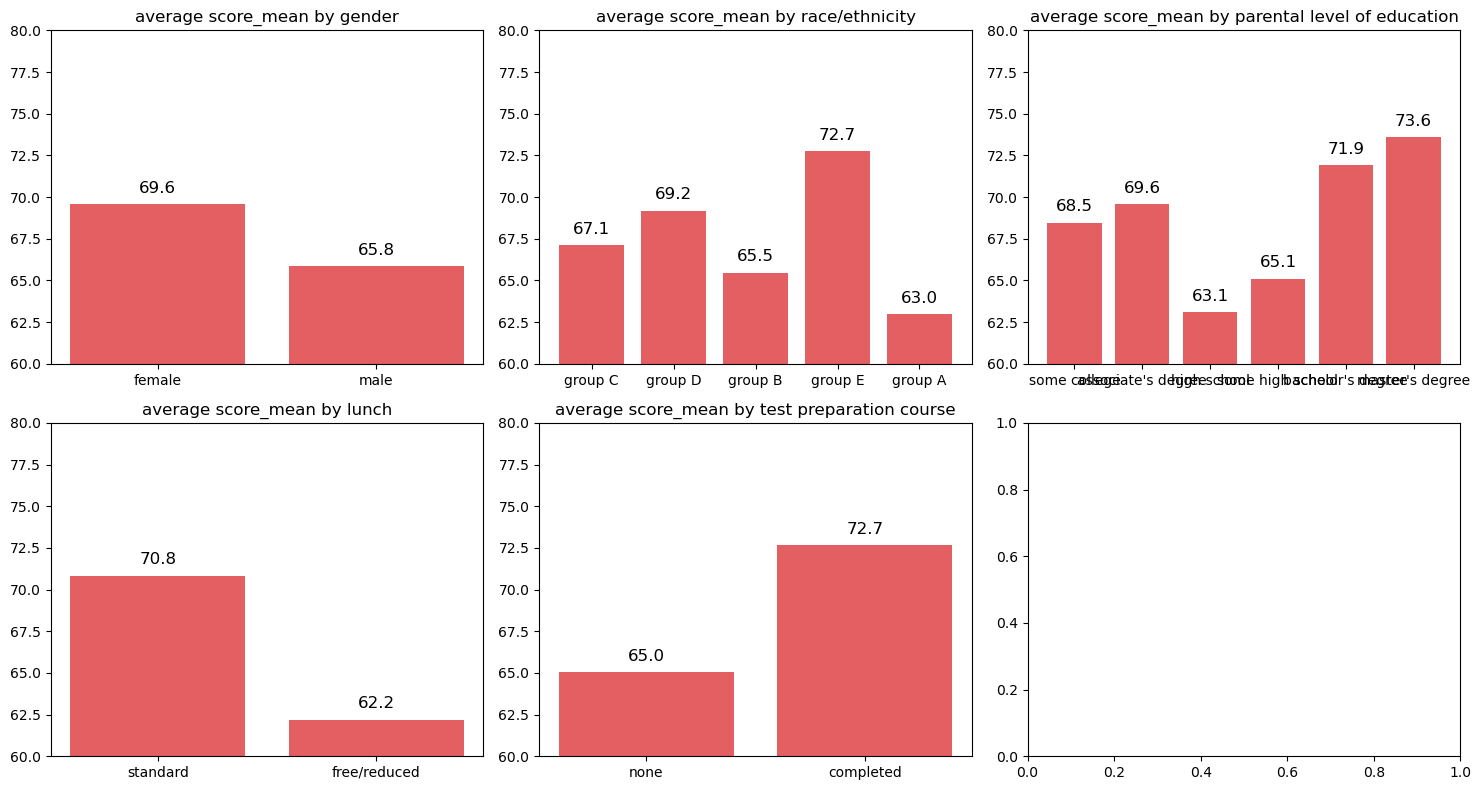

In [23]:
for i in score_column:
    print("<<",i,">>")
    bias_col_scr_2(i)

## 2.3 Check correlation with HeatMap
Number all column-specific data types before drawing a heat map. The method of digitizing is engineering by weighting in the order of high scores through the graph.

In [24]:
# gender
sex_mapping = {"male":0,"female":1}

#race/ethnicity
group_mapping = {"group A":0.2,"group B":0.4,"group C":0.6,"group D":0.8,"group E":1}

#parental level of education
degree_mapping = {"some college":0.4,
                  "associate's degree":0.6,
                  "high school":0,
                  "some high school":0.2,
                  "bachelor's degree":0.8,
                  "master's degree":1}

# lunch
lunch_mapping = {"standard":1,
                "free/reduced":0}

# test preparation course
course_mapping = {"none":0,
                 "completed":1}



df["gender"] = df["gender"].map(sex_mapping)
df["race/ethnicity"] = df["race/ethnicity"].map(group_mapping)
df["parental level of education"] = df["parental level of education"].map(degree_mapping)
df["lunch"] = df["lunch"].map(lunch_mapping)
df["test preparation course"] = df["test preparation course"].map(course_mapping)

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean
0,1,0.4,0.8,1,0,72,72,74,72.7
1,1,0.6,0.4,1,1,69,90,88,82.3
2,1,0.4,1.0,1,0,90,95,93,92.7
3,0,0.2,0.6,0,0,47,57,44,49.3
4,0,0.6,0.4,1,0,76,78,75,76.3


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   float64
 2   parental level of education  1000 non-null   float64
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   score_mean                   1000 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


In [27]:
# Feature Scaling

d_m = []
d_r = []
d_w = []
d_s = []
for i in range(len(df)):
    d_m.append(df['math score'].values[i]/100)
    d_r.append(df['reading score'].values[i]/100)
    d_w.append(df['writing score'].values[i]/100)
    d_s.append(df['score_mean'].values[i]/100)
df['math score'] = d_m
df['reading score'] = d_r
df['writing score'] = d_w
df['score_mean'] = d_s
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean
0,1,0.4,0.8,1,0,0.72,0.72,0.74,0.727
1,1,0.6,0.4,1,1,0.69,0.90,0.88,0.823
2,1,0.4,1.0,1,0,0.90,0.95,0.93,0.927
3,0,0.2,0.6,0,0,0.47,0.57,0.44,0.493
4,0,0.6,0.4,1,0,0.76,0.78,0.75,0.763


<Axes: title={'center': 'Correlation of Features'}>

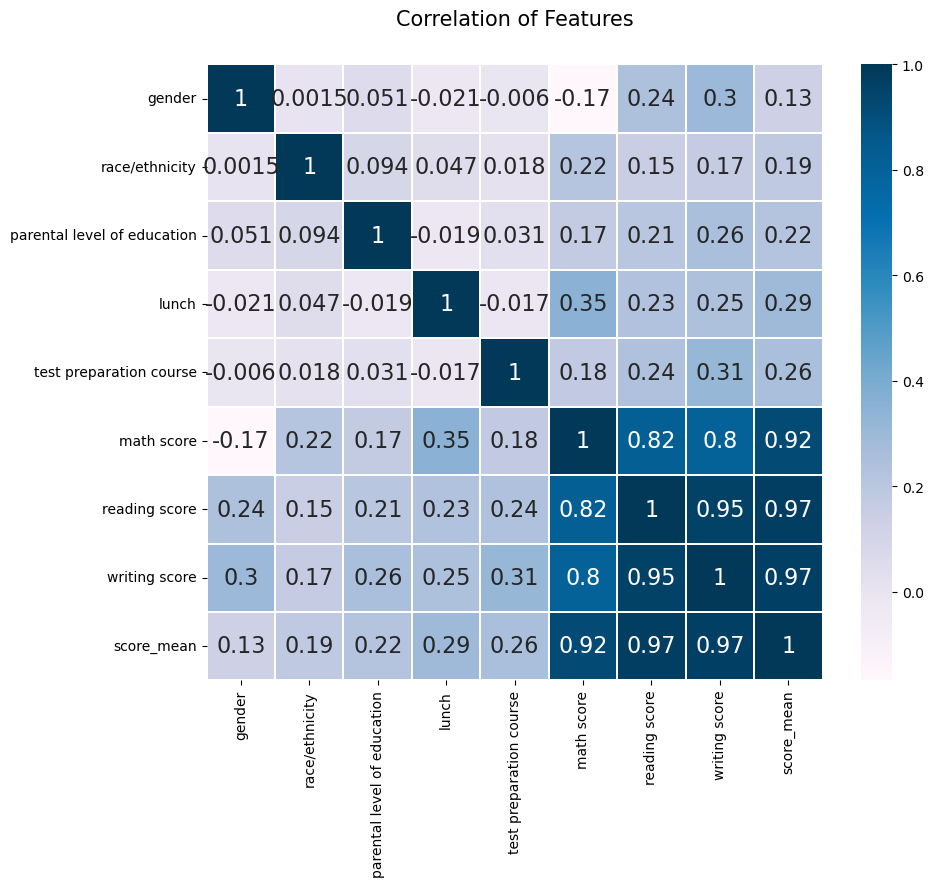

In [28]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

# Step 6: Machine Learning]
### Predict pass or not the test
We will create machine learning models that predict whether or not we passed the test by dividing the criteria by passing the test if the test score is more than 60 and failing if it is lower than 60.
At first, make a new column which is mean pass or not

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean
0,1,0.4,0.8,1,0,0.72,0.72,0.74,0.727
1,1,0.6,0.4,1,1,0.69,0.90,0.88,0.823
2,1,0.4,1.0,1,0,0.90,0.95,0.93,0.927
3,0,0.2,0.6,0,0,0.47,0.57,0.44,0.493
4,0,0.6,0.4,1,0,0.76,0.78,0.75,0.763


In [30]:
pass_or_not = []
for i in range(len(df)):
    if df["score_mean"][i] >= 0.6:
        pass_or_not.append(1)
    else:
        pass_or_not.append(0)
df["pass_or_not"] = pass_or_not
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean,pass_or_not
0,1,0.4,0.8,1,0,0.72,0.72,0.74,0.727,1
1,1,0.6,0.4,1,1,0.69,0.90,0.88,0.823,1
2,1,0.4,1.0,1,0,0.90,0.95,0.93,0.927,1
3,0,0.2,0.6,0,0,0.47,0.57,0.44,0.493,0
4,0,0.6,0.4,1,0,0.76,0.78,0.75,0.763,1


## Splitting data

In [31]:
split_x = df[df.columns[:5]]
split_x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,1,0.4,0.8,1,0
1,1,0.6,0.4,1,1
2,1,0.4,1.0,1,0
3,0,0.2,0.6,0,0
4,0,0.6,0.4,1,0


In [32]:
split_y = df[df.columns[-1]]
split_y.head()

0    1
1    1
2    1
3    0
4    1
Name: pass_or_not, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
# shuffle = False
X_train, X_test, y_train, y_test = train_test_split(split_x, split_y, test_size=0.25, shuffle=False, random_state=1004)

In [37]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,1,0.4,0.8,1,0
1,1,0.6,0.4,1,1
2,1,0.4,1.0,1,0
3,0,0.2,0.6,0,0
4,0,0.6,0.4,1,0
...,...,...,...,...,...
745,0,0.8,0.6,1,0
746,0,0.8,0.0,1,0
747,0,0.6,0.4,1,0
748,1,0.6,0.8,0,0


In [38]:
y_train

0      1
1      1
2      1
3      0
4      1
      ..
745    1
746    1
747    1
748    0
749    1
Name: pass_or_not, Length: 750, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Model Training

In [40]:
# Dictionary of all models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [41]:
# Function to evaluate and return metrics
def evaluate_model(name, model, X_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)

    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}

In [42]:
results = []

# Loop through each model, train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res = evaluate_model(name, model, X_test, y_test, y_pred)
    results.append(res)

# Create DataFrame from results
results_df = pd.DataFrame(results)
results_df


Model: Logistic Regression
Accuracy: 0.704
Precision: 0.7361111111111112
Recall: 0.9034090909090909
F1 Score: 0.8112244897959184
Confusion Matrix:
 [[ 17  57]
 [ 17 159]]

Model: Random Forest
Accuracy: 0.68
Precision: 0.7474226804123711
Recall: 0.8238636363636364
F1 Score: 0.7837837837837838
Confusion Matrix:
 [[ 25  49]
 [ 31 145]]

Model: Decision Tree
Accuracy: 0.66
Precision: 0.745945945945946
Recall: 0.7840909090909091
F1 Score: 0.7645429362880887
Confusion Matrix:
 [[ 27  47]
 [ 38 138]]

Model: SVM
Accuracy: 0.708
Precision: 0.7373271889400922
Recall: 0.9090909090909091
F1 Score: 0.8142493638676845
Confusion Matrix:
 [[ 17  57]
 [ 16 160]]

Model: KNN
Accuracy: 0.684
Precision: 0.7461928934010152
Recall: 0.8352272727272727
F1 Score: 0.7882037533512063
Confusion Matrix:
 [[ 24  50]
 [ 29 147]]


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.704,0.736111,0.903409,0.811224
1,Random Forest,0.680,0.747423,0.823864,0.783784
2,Decision Tree,0.660,0.745946,0.784091,0.764543
3,SVM,0.708,0.737327,0.909091,0.814249
4,KNN,0.684,0.746193,0.835227,0.788204


## Step 7: Comparing models

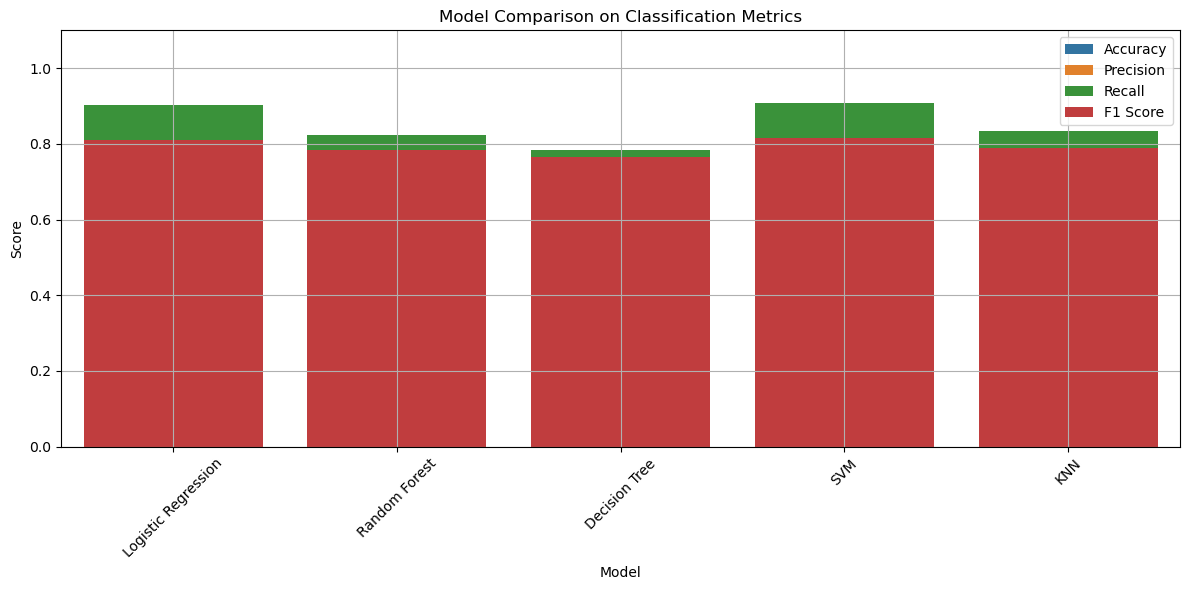

In [43]:
# Plot bar graph for each metric
plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

for metric in metrics:
    sns.barplot(x="Model", y=metric, data=results_df, label=metric)

plt.title("Model Comparison on Classification Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Conclusion
📌 Conclusion
In this notebook, we performed a complete analysis and classification pipeline on student performance data. Here's a summary of what we achieved:

1. Data Exploration:
- Explored column-wise descriptions and value distributions.
- Found no missing values and confirmed the dataset was clean.
- Observed insightful patterns, such as the influence of gender, parental education, and test preparation on scores.

2. Visualization & Analysis:
- Used KDE plots to visualize score distributions across different demographic groups.
- Identified that students who completed the test preparation course performed significantly better on average.

3. Preprocessing & Feature Engineering:
- Categorical columns were encoded numerically.
- Features are scaled
- A binary label pass_or_not was created for classification based on score thresholds.

4. Model Building:
- Trained multiple machine learning models: Logistic Regression, Decision Tree, Random Forest, SVM, and KNN.
- Evaluated each model using accuracy, precision, recall, and F1 score.

5. Model Comparison:
- Plotted model-wise accuracy scores.
- Identified the best performing model based on overall performance metrics.

📈 Final Verdict:
The best-performing model was SVM, offering a balance of high accuracy and robust precision/recall. This model is recommended for predicting student success based on input features.